<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# import the Python modules and packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
url  = [ #ibra50
  'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/IBXLDia_15-12-23.csv'
#ibra100
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/IBXXDia_15-12-23.csv'
#div
  , 'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/IDIVDia_15-12-23.csv' 
#ibov
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/IBOVDia_15-12-23.csv'
#small
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/data/SMLLDia_15-12-23.csv'
]

escolha = int(input('0-ibra50; 1-ibra100; 2-idiv; 3-ibov; 4-smal: '))
indice = { 0:'Ibra50' , 1:'Ibra100' , 2:'Idiv' , 3:'Ibov' , 4:'Small'}
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')
# view the first 5 lines
df

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,235661666,2.122
1,TTEN3,3TENTOS,ON NM,113777586,0.402
2,ABCB4,ABC BRASIL,PN N2,66485201,0.516
3,AERI3,AERIS,ON NM,690257429,0.214
4,AESB3,AES BRASIL,ON NM,317103937,1.253
...,...,...,...,...,...
110,VIVA3,VIVARA S.A.,ON NM,107725671,1.187
111,VULC3,VULCABRAS,ON NM,73322347,0.499
112,WIZC3,WIZ CO,ON NM,75273443,0.177
113,YDUQ3,YDUQS PART,ON NM,289347914,2.182


In [71]:
# import yfinance or install it first
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

In [72]:
%timeit
# use yfinance to collect the data
data = yf.download((df['Código']+'.SA').to_list(),
                         period="3mo",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)

[*********************100%%**********************]  115 of 115 completed


In [73]:
# select from the multiindex to eyeball data
# data.xs('WEGE3.SA', axis=1, level=1).head()

In [74]:
data_close = data['Close']
data_returns = data_close.pct_change(1).dropna()
data_returns.head()

,AALR3.SA,ABCB4.SA,AERI3.SA,AESB3.SA,AGRO3.SA,ALOS3.SA,ALPA4.SA,ALUP11.SA,AMBP3.SA,ANIM3.SA,...,TTEN3.SA,TUPY3.SA,UNIP6.SA,USIM5.SA,VIVA3.SA,VLID3.SA,VULC3.SA,WIZC3.SA,YDUQ3.SA,ZAMP3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-19,-0.019459,0.010304,-0.025000,0.014465,-0.001041,-0.001364,0.005487,0.000359,-0.012719,-0.039286,...,0.013699,-0.006767,-0.015180,-0.012945,-0.001550,-0.004169,0.002157,0.000000,0.007563,0.008475
2023-10-20,-0.048512,-0.013259,-0.012821,0.004753,0.009378,0.002732,-0.016371,0.014352,-0.133119,-0.011152,...,0.036036,-0.001603,-0.007157,-0.024590,0.005045,0.000000,-0.015608,0.016000,-0.019303,0.016807
2023-10-23,-0.002318,-0.002584,0.051948,0.003784,0.021679,0.038147,0.031900,0.004245,-0.070588,0.048872,...,0.004348,0.014452,0.007901,-0.003361,0.032046,0.001794,0.002187,0.001969,0.008201,0.011570
2023-10-24,0.067364,0.008808,0.000000,0.001885,0.016504,0.020560,0.052419,0.001409,0.033311,0.032258,...,0.020779,0.005540,0.004126,0.006745,0.011598,0.005373,-0.009820,-0.005894,0.005965,0.044118
2023-10-25,0.031556,-0.013354,-0.012346,-0.019755,-0.090021,-0.007715,-0.005109,-0.014421,-0.033527,-0.065972,...,-0.016115,0.000787,-0.012875,-0.016750,-0.044379,-0.036223,0.000551,-0.013834,-0.014016,-0.023474


## Data Wrangling
Vamos se livrar de quaisquer ações que esticaram muito em um único dia e perdemos o barco, o próximo passo é eliminar todas as linhas que cresceram mais de 20% em um dia.

In [75]:
data_returns.shape

(40, 115)

In [76]:
# set the growth theshold
daily_growth_threshold = 0.2
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]

In [77]:
data_returns.shape

(40, 113)

In [78]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

## The  Top Ten  


In [79]:
# take the last row, transpose, x100
latest = data_cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:10], 2)
topten

,% change
LJQQ3.SA,74.01
CEAB3.SA,66.67
ANIM3.SA,55.36
PTBL3.SA,51.81
PLPL3.SA,46.55
COGN3.SA,45.61
GUAR3.SA,43.61
USIM5.SA,42.88
CVCB3.SA,40.59
MRFG3.SA,39.85


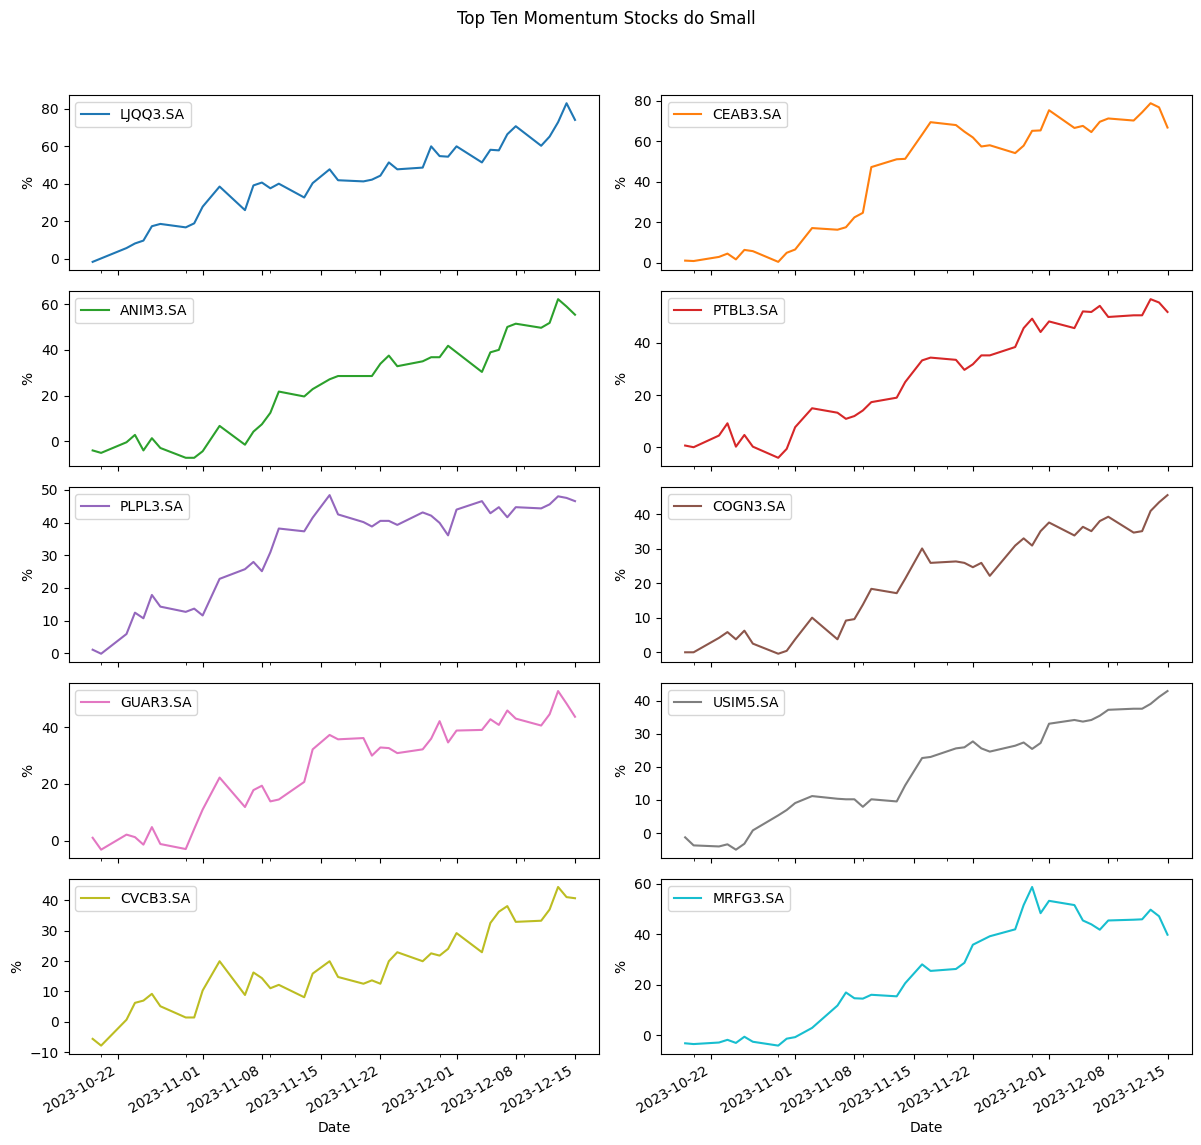

In [80]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(5, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title=f'Top Ten Momentum Stocks do {indice[escolha]}')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Infos


In [81]:
!pip install yfinance --upgrade --no-cache -q


In [82]:
topten.index

Index(['LJQQ3.SA', 'CEAB3.SA', 'ANIM3.SA', 'PTBL3.SA', 'PLPL3.SA', 'COGN3.SA',
       'GUAR3.SA', 'USIM5.SA', 'CVCB3.SA', 'MRFG3.SA'],
      dtype='object')

In [84]:
# get further information
topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).get_info()
# add the information to a data frame
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
# add the growth data
info_df['Growth'] = topten
# rank the companies by growth rate
info_df.sort_values(by=['Growth'], ascending=False, inplace=True)
info_df.head()

,address1,city,state,zip,country,phone,website,industry,industryKey,industryDisp,...,dividendYield,earningsQuarterlyGrowth,earningsGrowth,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,governanceEpochDate,Growth
LJQQ3.SA,"Avenida General Flores da Cunha, 1943",Cachoeirinha,RS,94910-003,Brazil,55 51 3441 5798,https://www.queroquero.com.br,Specialty Retail,specialty-retail,Specialty Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.01
CEAB3.SA,"Alameda Araguaia, 1.222",Barueri,SP,06455-000,Brazil,55 11 4571 2960,https://www.cea.com.br,Specialty Retail,specialty-retail,Specialty Retail,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.67
ANIM3.SA,"HARMONIA STREET, 1250",São Paulo,SP,05443-001,Brazil,NaN,https://www.animaeducacao.com.br,Education & Training Services,education-training-services,Education & Training Services,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.36
PTBL3.SA,"Rodovia BR-101, km 163",Tijucas,SC,88200-000,Brazil,55 80 0648 2002,https://www.portobello.com.br,Building Products & Equipment,building-products-equipment,Building Products & Equipment,...,0.0711,-0.924,-0.924,NaN,NaN,NaN,NaN,NaN,NaN,51.81
PLPL3.SA,"Rua Samuel Morse, 74",São Paulo,SP,04576-060,Brazil,55 11 4095 7332,https://www.planoeplano.com.br,Real Estate - Development,real-estate-development,Real Estate - Development,...,0.0134,1.193,1.204,NaN,NaN,NaN,NaN,NaN,NaN,46.55


#### Setores das top ten

In [85]:
info_df['sector'].value_counts()

sector
Consumer Cyclical     4
Consumer Defensive    3
Industrials           1
Real Estate           1
Basic Materials       1
Name: count, dtype: int64